### Statistical Analysis of Generated Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, glob
%matplotlib widget

#### Data distribution

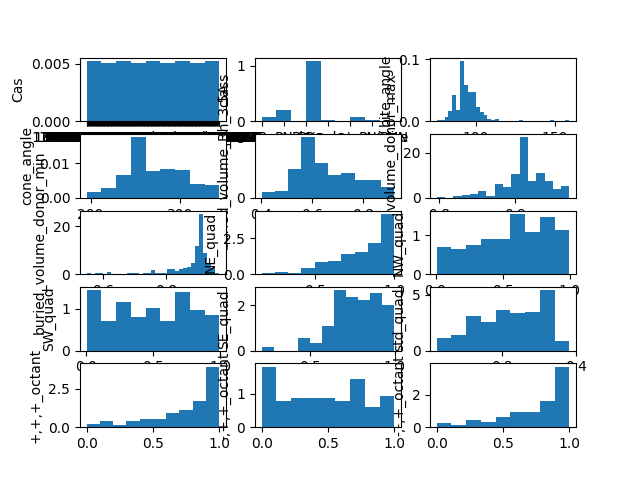

In [3]:
# Histograms of data

mace_averaged_oh = pd.read_excel('mf_BD_Rh_test2.xlsx').dropna()

# mace_averaged_oh = oh.groupby(['Cas']).mean()
fig, ax = plt.subplots(5,3)
descriptors = mace_averaged_oh.columns

descriptor_count = 0
for i in range(5):
    for j in range(3):
        
        ax[i, j].hist(x = mace_averaged_oh[descriptors[descriptor_count]], bins='auto', density=True)
        ax[i, j].set_ylabel(descriptors[descriptor_count])
        descriptor_count+=1
        


#### MLR on selected data points

In [4]:
from sklearn.linear_model import LinearRegression
from pandas import read_excel
import numpy as np


def MLR(X, y):
    # data = read_excel('PCA.xlsx')
    # X = np.array([list(data['steric']),  list(data['elec']), list(data['geom'])]).T
    # y = list(data['yield'])

    reg = LinearRegression().fit(X, y)

    print('R2 = ', reg.score(X,y))

    # print('coef: ', reg.coef_, 'intercept:', reg.intercept_)
    return reg.score(X,y)


#### PCA

In [5]:
from sklearn.decomposition import PCA
from umap import UMAP
import itertools

data = mace_averaged_oh


geom_keys = ['bite_angle', 'cone_angle']
steric_keys = ['dipole', 'sasa','buried_volume_Rh_4A', 'buried_volume_donor_max', 'buried_volume_donor_min', 'bite_angle', 'cone_angle']
elec_keys = ['HOMO_LUMO_gap', 'dispersion', 'ea','nucleofugality', 'electrofugality', 'electrophilicity', 'nucleophilicity']

pca1 = UMAP(n_components=1)
pca2 = UMAP(n_components=1)
pca3 = UMAP(n_components=3)

u_geom = pca1.fit_transform(data[geom_keys]) 
u_steric = pca2.fit_transform(data[steric_keys])
u_elec = pca3.fit_transform(data[elec_keys])


data['Cas'] = data.index
dataframe = pd.DataFrame()

descriptor_order = 1

dataframe['steric1'] = u_steric[:, 0]
# dataframe['steric2'] = u_steric[:, 1]
dataframe['elec1'] = u_elec[:, 0]
dataframe['elec2'] = u_elec[:, 1]
dataframe['elec3'] = u_elec[:, 2]
dataframe['geom'] = u_geom[:, 0]

### Add second order interactions
# for comb in itertools.combinations(['steric1', 'elec1','elec2','elec3', 'geom' ], 2):
#     dataframe["_".join(comb)] = dataframe[comb[0]] * dataframe[comb[1]]

# for index, key1 in enumerate(dataframe.keys()):
#     for key2 in dataframe.keys()[index:]:
#         dataframe[key1 + '_' + key2] = dataframe[key1]*dataframe[key2] 

# dataframe['yield'] = data['yield'].to_list()
# dataframe['ee'] = data['ee'].to_list()

# dataframe['Cas'] = data['Cas'].to_list()
# dataframe['label_yield'] = pd.cut(x = dataframe['yield'], bins=[0, 0.8, 1],
#                      labels=[0, 1])

# dataframe.to_excel('PCA3_good_substrate_.xlsx')

# X = np.array([list(dataframe['steric1']),list(dataframe['steric2']), list(dataframe['elec1']),  list(dataframe['elec2']), list(dataframe['elec3']), list(dataframe['geom'])])
# print(X)
# X2 = X**2
# X3 = X**3

# X = dataframe.drop(['Cas', 'yield', 'label_yield', 'ee'], axis=1)

# X = np.array([X, X2, X3])
# y = dataframe ['yield']
# X = list(dataframe['elec1'])
# y = list(dataframe['elec3'])

# MLR(X, y)


In [12]:
plt.close('all')
plt.scatter(mace_averaged_oh['buried_volume'], mace_averaged_oh['yield'])
plt.show()

KeyError: 'buried_volume'

# Function for confidence intervals

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


arr = np.linspace(0, 50, 100).reshape((10, 10))

fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('twilight')
new_cmap = truncate_colormap(cmap, 0.2, 0.8)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
# plt.show()
plt.close('all')

NameError: name 'confidence_ellipse' is not defined

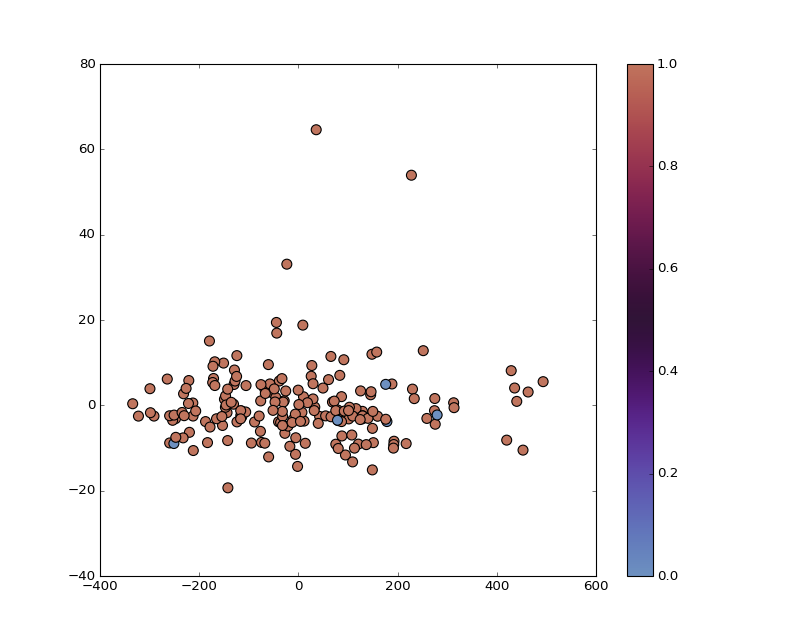

In [11]:
fig, ax_nstd = plt.subplots(figsize=(10, 8))
plt.style.use('classic')
plt.rcParams['image.cmap'] = new_cmap

p1 = 'steric1'
p2 = 'geom'
heat_map = 'HOMO_LUMO_gap'
### Change all ferrocenes
x = dataframe[p1] 
y = dataframe[p2] 

mu = np.average(x), np.average(y)

sc = ax_nstd.scatter(x, y, c=mace_averaged_oh[heat_map]>0.035, s=80)
fig.colorbar(sc)

# 1365531-98-1

# confidence_ellipse(x, y, ax_nstd, n_std=1,
#     label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
    label=r'95% confidence interval', edgecolor='fuchsia', linestyle='--')

# confidence_ellipse(x, y, ax_nstd, n_std=3,
#     label=r'$3\sigma$', edgecolor='blue', linestyle=':')


annot = ax_nstd.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

dataframe['Cas'] = data['Cas']
names = list(dataframe['Cas'])

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    # annot.get_bbox_patch().set_facecolor(cmap(np.linalg.norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)

def hover(event):
    vis = annot.get_visible()
    try:
        if event.inaxes == ax_nstd:
            cont, ind = sc.contains(event)
            if cont:
                print(annot, end=" "*50 + '\r')
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()
    except Exception:
        pass
    
fig.canvas.mpl_connect("motion_notify_event", hover)

ax_nstd.scatter(mu[0], mu[1], s=10)
ax_nstd.set_title('Different standard deviations')
ax_nstd.set_xlabel(p1)
ax_nstd.set_ylabel(p2)
fig.set_facecolor('white')
ax_nstd.legend()

plt.savefig("std_{}_{}_heatmap_{}.png".format(p1, p2, heat_map), dpi=400, bbox_inches='tight')
plt.show()  

In [44]:
print(dataframe.columns)

Index(['steric1', 'elec1', 'elec2', 'elec3', 'geom'], dtype='object')


## Multinomial Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


df = pd.read_excel('PCA3_good_substrate_.xlsx')

X = df.drop(['yield', 'Cas', 'label_yield', 'ee'], axis=1)

y = df['label_yield']

random_states = 30
store = []
for random_state in range(random_states):
    X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                    random_state=random_state, 
                                    test_size=0.25, 
                                    shuffle=True)
    lr = LogisticRegression(max_iter=1800)
    lr.fit(X_train, y_train)
    preds = lr.predict(X_test)
    prob = preds==y_test

    store.append(np.average(prob))

print('size=', len(X_test))
print('avg =', np.average(store), np.max(store), np.argmax(store))
# print(np.average(prob))
# a = pd.DataFrame(preds)
# a.to_excel('preds.xlsx')



c:\Users\Adrian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Adrian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

size= 11
avg = 0.7424242424242423 1.0 17


c:\Users\Adrian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## MLR

In [74]:
random_states = 10
store = []
for random_state in range(random_states):
    X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                    random_state=random_state, 
                                    test_size=0.25, 
                                    shuffle=True)
    
    model = LinearRegression()
    reg  = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('R2 = ', reg.score(X_test, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [14, 194]

### ExtraTreesClassifier

Top features:
1. feature 3 (0.115367)
2. feature 15 (0.096971)
3. feature 7 (0.089566)
4. feature 1 (0.073148)
5. feature 6 (0.063451)
6. feature 8 (0.060180)
7. feature 5 (0.059644)


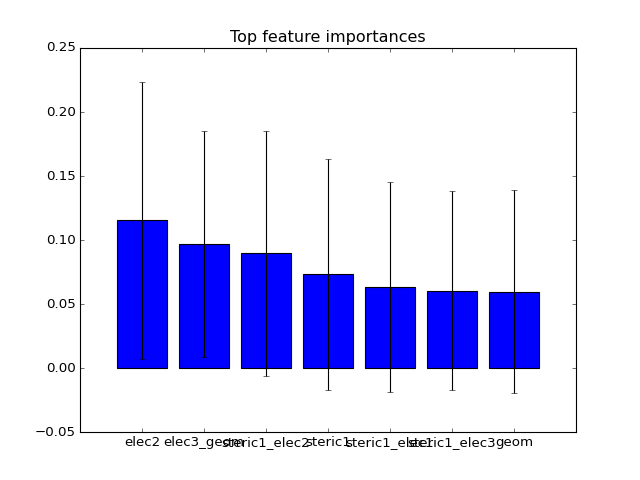

Index(['Unnamed: 0', 'steric1', 'elec1', 'elec2', 'elec3', 'geom',
       'steric1_elec1', 'steric1_elec2', 'steric1_elec3', 'steric1_geom',
       'elec1_elec2', 'elec1_elec3', 'elec1_geom', 'elec2_elec3', 'elec2_geom',
       'elec3_geom'],
      dtype='object')


In [39]:
from sklearn.ensemble import ExtraTreesClassifier
plt.style.use('classic')
TOP_FEATURES = 7
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                random_state=42, 
                                test_size=0.25, 
                                shuffle=True)

# model = LinearRegression()
# reg  = model.fit(X_train, y_train)

forest = ExtraTreesClassifier(n_estimators=700, max_depth=10, random_state=15)
forest.fit(X_train,y_train)

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))
    
fig = plt.figure()
plt.title('Top feature importances')
plt.bar(
    range(TOP_FEATURES), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(TOP_FEATURES), X_train.keys()._data[indices])
fig.set_facecolor('white')
plt.show()
print(X_train.keys())
plt.savefig('feature_ranking.png')

### Stacking classifier

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
import random

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                random_state=random.randrange(100), 
                                test_size=0.25, 
                                shuffle=True)


m = StackingClassifier(
    classifiers=[
        LogisticRegression(max_iter=5000),
        XGBClassifier(max_depth=10)
    ],
    use_probas=True,
    meta_classifier=LogisticRegression()
)

m = m.fit(X_train,y_train)
print(m.predict(X_test), y_test, 'R2', m.score(X_test,y_test))


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                random_state=random.randrange(100), 
                                test_size=0.25, 
                                shuffle=True)
regr = RandomForestRegressor(max_depth=2, random_state=random.randrange(100))
regr = regr.fit(X_train, y_train)

print(list(np.abs(np.array(y_test) - np.array(regr.predict(X_test)))/np.array(y_test) * 100))

### 3D Plot


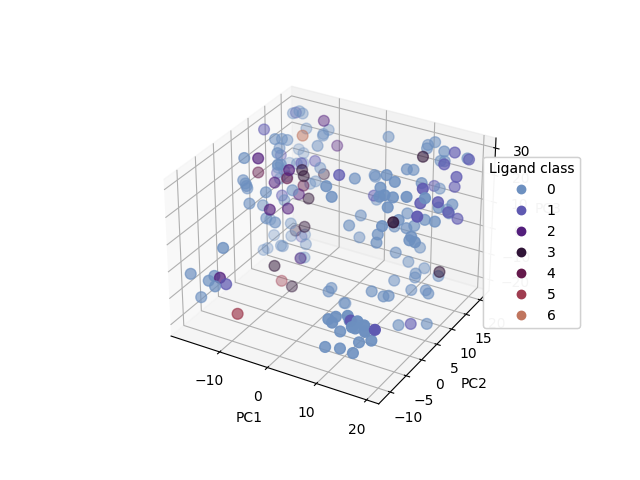

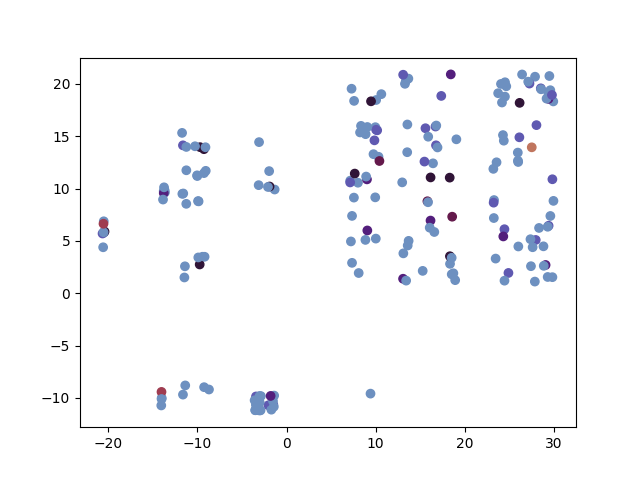

In [22]:
from sklearn.decomposition import PCA
plt.close('all')
pca1 = UMAP(n_components=1)
pca2 = UMAP(n_components=1)
pca3 = UMAP(n_components=1)
oh = pd.read_excel('mf_BD_Rh_test2.xlsx').dropna()
dataframe =oh.groupby(['Cas']).mean()
# all_keys = geom_keys[:]
# all_keys.extend(steric_keys)
# all_keys.extend(elec_keys)

u_geom = pca1.fit_transform(dataframe[geom_keys]) 
# print(pca.explained_variance_ratio_)

u_steric = pca2.fit_transform(dataframe[steric_keys])
# print(pca.explained_variance_ratio_)

u_elec = pca3.fit_transform(dataframe[elec_keys])
# a = pca.fit_transform(dataframe[all_keys])
# print(pca.explained_variance_ratio_)

# u_geom, u_steric, u_elec = pca.fit_transform(dataframe[all_keys])[:, 0], pca.fit_transform(dataframe[all_keys])[:, 1], pca.fit_transform(dataframe[all_keys])[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Gen colors 
# reds = np.zeros((len(df['yield']), 3))
# for i in range(len(df['yield'])):
#     reds[i,:] = [df['yield'][i],  df['yield'][i]/10, df['yield'][i]/10]
# plt.rcParams['image.cmap'] = new_cmap
oh['class'].replace(['PP', 'PN', 'P', 'Phosphoramidite', "P(P=O)", "PNS", "PNN"], [0, 1, 2, 3, 4, 5, 6], inplace=True)
# plt.legend(['PP', 'PN', 'P', 'Phosphoramidite', "P(P=O)", "PNS", "PNN"])

p = ax.scatter(u_geom, u_elec, u_steric, label=oh['class'], c = oh['class'], s=60)

legend1 = ax.legend(*p.legend_elements(),bbox_to_anchor=(1.2, 0.5),
                    loc="center right", title="Ligand class")

ax.add_artist(legend1)

ax.set_xlabel('PC1') # geom effects
ax.set_ylabel('PC2') 
ax.set_zlabel('PC3')
# fig.colorbar(p, fraction=0.025, pad=0.05)
fig.set_facecolor('white')
fig.savefig('3D_PCA.png', dpi=300, bbox_inches='tight')


plt.figure()
plt.scatter(u_steric, u_elec, c = oh['class'])

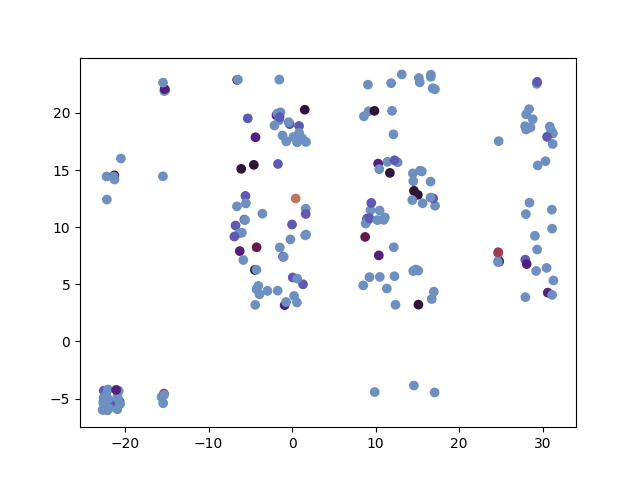

In [19]:
plt.figure()
plt.scatter(u_steric, u_elec, c = oh['class'])

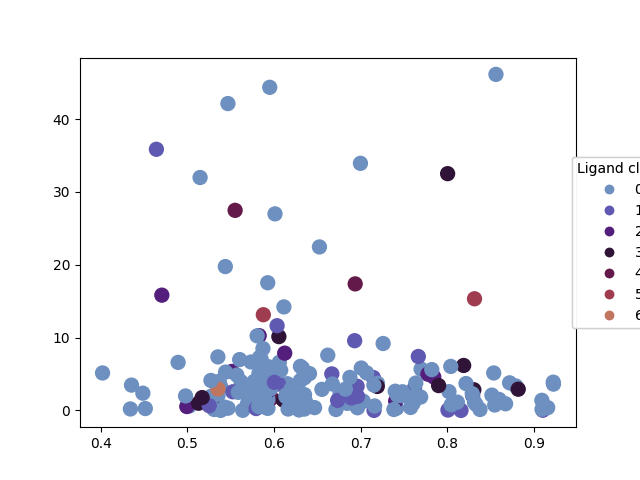

In [20]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(oh['buried_volume_Rh_3.5A'], oh['dipole'], label=oh['class'], c=oh['class'], s=100, marker='o',  facecolors='none')


fig.set_facecolor('white')

legend1 = ax.legend(*p.legend_elements(),bbox_to_anchor=(1.2, 0.5),
                    loc="center right", title="Ligand class")

ax.add_artist(legend1)
plt.show()

## Ir-P bonds MLR


In [22]:
# Pkg
import pandas as pd
import numpy as np

# Import data from distances

data = pd.read_excel('distances.xlsx')
# print(data)
data = data[data['yield'] > 0.32]
X = data.drop(['yield'], axis=1)
y = data['yield']

# Skeleton bond ->> (2.34603586872537, 2.401789943590405)
skeleton_bond = (2.34603586872537, 2.401789943590405)
MLR(X, y)

NameError: name 'MLR' is not defined

In [ ]:

from morfeus import read_xyz
from numpy.linalg import norm
import os, glob
import numpy as np
import pandas as pd


def find_distance(xyz):
    elements, coordinates = read_xyz(xyz)
    P_coord = []
    for ind_element, element in enumerate(elements):
        if element == 'P':
            P_coord.append(ind_element)
        if element == 'Ir':
            ind_Ir = ind_element

    d1 = norm(coordinates[ind_Ir]  - coordinates[P_coord[0]])
    d2 = norm(coordinates[ind_Ir]  - coordinates[P_coord[1]])

    return d1, d2

find_distance('xtbopt.xyz')

KeyError: 'elec1'

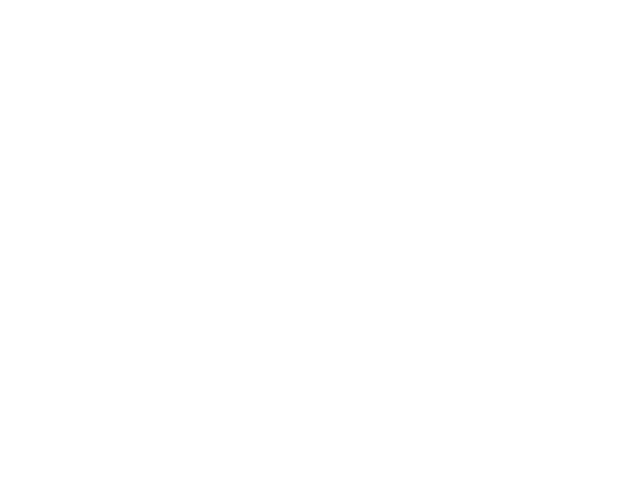

In [23]:
plt.figure()
y =  mace_averaged_oh[heat_map]
X = X[(X['elec1'] > -5) & (X['elec1'] < 4.6) & (X['steric1']<280)] 
p = plt.scatter(X['steric1'], X['elec1'], s=160)
MLR(np.array(X['steric1']).reshape(-1,1), X['elec1'])

print(y)
# fig.colorbar()


plt.show()

### Sigman dataset

In [ ]:
### Find correlation between the yield column and all others.

dataframe_sigman = pd.read_excel('JNJ_AH_Sigman_descriptors_CLEAN.xlsx').dropna()
features = dataframe_sigman.drop(['JNJ Entry #', 'JNJ alias', 'CAS', 'Yield', 'Formula', 'Class','Sigman Ligand ID', 'Sigman ligand name'], axis = 1)
y = dataframe_sigman['Yield']
R2s = []
for i in range(len(features)):
    try:
        plt.figure()
        plt.scatter(features[features.columns[i]], y)
        plt.savefig('presentation_images/{}.png'.format(features.columns[i]))
        
        R2 = MLR(np.array(features[features.columns[i]]).reshape(-1,1), y)
        R2s.append(R2)
        print(features.columns[i])
        plt.close('all')
    except Exception:   
        plt.close('all')


print(np.argmax(np.array(R2s)))


In [ ]:
sp = pd.read_excel('descriptors_SP.xlsx').dropna()
sp = sp.groupby(['Cas']).mean()
oh = mace_averaged_oh

sp.columns = (i + '_bd' for i in sp.columns)
common = sp.join(oh, how='inner')
print(common)
plt.figure()
plt.scatter(common['cone_angle_bd'], common.cone_angle)
plt.show()
MLR(np.array(common['cone_angle_bd', 'bite_angle_bd']).reshape(-1, 1), common.cone_angle)

### BD OH correlation

In [ ]:
%clear --output

KeyError: 'std_quadrant'

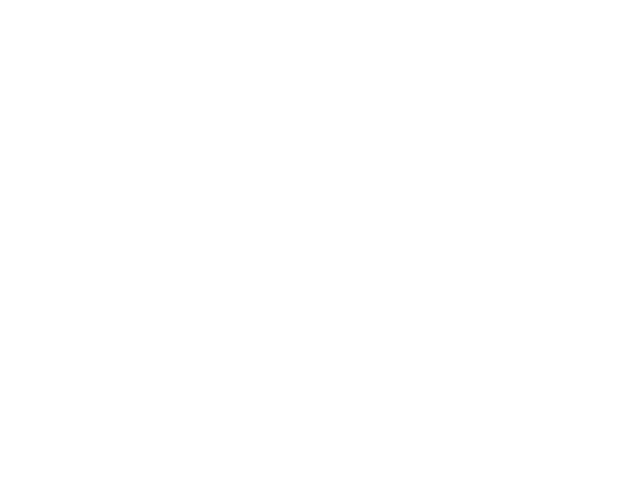

In [19]:
plt.figure()
plt.scatter(data['std_quadrant'], data['dipole'])
plt.show()

In [15]:
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# y = data['HOMO_LUMO_gap'][:100]
# y = y > 0.04

# X = data[['dipole', 'NE_quad']][:100]
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(X, y)

# print(clf.predict(data[['dipole', 'NE_quad']]))

DATA = pd.read_excel('mf_BD_Rh_test2.xlsx')
print(DATA.columns)

Index(['Cas', 'bite_angle', 'cone_angle', 'buried_volume_Rh_3.5A',
       'buried_volume_donor_max', 'buried_volume_donor_min', 'NE_quad',
       'NW_quad', 'SW_quad', 'SE_quad', 'std_quad', '+,+,+_octant',
       '-,+,+_octant', '-,-,+_octant', '+,-,+_octant', '+,-,-_octant',
       '-,-,-_octant', '-,+,-_octant', '+,+,-_octant', 'std_octant',
       'buried_volume_Rh_4A', 'buried_volume_Rh_5A', 'buried_volume_Rh_6A',
       'buried_volume_Rh_7A', 'dispersion', 'sasa', 'ip', 'dipole', 'ea',
       'electrofugality', 'nucleofugality', 'nucleophilicity',
       'electrophilicity', 'HOMO_LUMO_gap'],
      dtype='object')


Accuracy (train) for L1 logistic: 93.8% 
Accuracy (train) for L2 logistic (Multinomial): 93.8% 
Accuracy (train) for L2 logistic (OvR): 93.8% 
Accuracy (train) for Linear SVC: 93.8% 
Accuracy (train) for GPC: 93.8% 


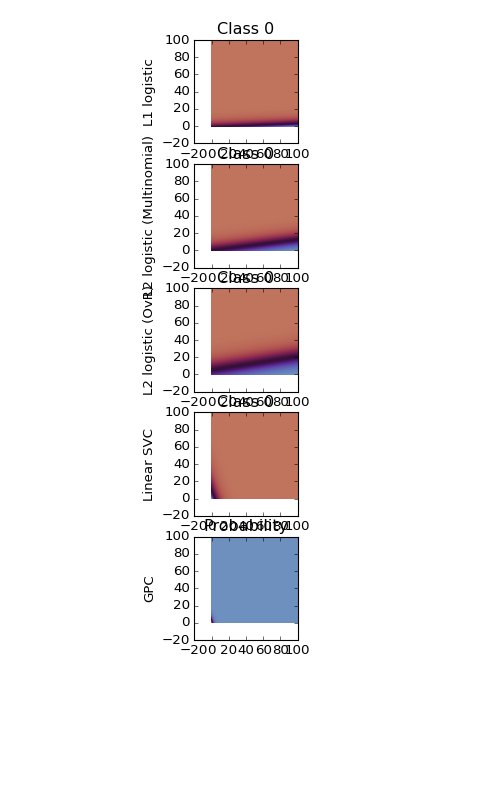

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets


X = np.array(DATA)[:, [9 , 10]]  # we only take the first two features for visualization
y = DATA.dispersion > 30

# n_features = X.shape[32]
n_features=2
C = 16
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    "L1 logistic": LogisticRegression(
        C=C, penalty="l1", solver="saga", multi_class="multinomial", max_iter=10000
    ),
    "L2 logistic (Multinomial)": LogisticRegression(
        C=C, penalty="l2", solver="saga", multi_class="multinomial", max_iter=10000
    ),
    "L2 logistic (OvR)": LogisticRegression(
        C=C, penalty="l2", solver="saga", multi_class="ovr", max_iter=10000
    ),
    "Linear SVC": SVC(kernel="linear", C=C, probability=True, random_state=0),
    "GPC": GaussianProcessClassifier(kernel),
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=0.2, top=0.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(
            probas[:, k].reshape((100, 100)), origin="lower"
        )
        # plt.xticks(())
        # plt.yticks(())
        idx = y_pred == k
        plt.scatter(X[idx, 0], X[idx, 1], marker="o", c="w", edgecolor="k")

# ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation="horizontal")

plt.show()

[[0.33126493 0.31007878]
 [0.24993395 0.35436106]
 [0.29787289 0.16653259]
 [0.33478349 0.34100703]
 [0.34025164 0.21021974]
 [0.33348703 0.29962223]
 [0.31438053 0.10980539]
 [0.35413888 0.08138092]
 [0.18449193 0.35349889]
 [0.33481279 0.25037926]
 [0.3526451  0.29356271]
 [0.32932589 0.31482553]
 [0.31634635 0.08689567]
 [0.3503534  0.23091412]
 [0.21825607 0.04164776]
 [0.33242093 0.05261342]
 [0.39093026 0.33012225]
 [0.31996779 0.28002621]
 [0.30038038 0.14375055]
 [0.33378767 0.12139549]
 [0.21598379 0.23584264]
 [0.11302719 0.11170674]
 [0.36352008 0.34123222]
 [0.32664983 0.24254128]
 [0.35139074 0.3225623 ]
 [0.13798959 0.24551724]
 [0.20078728 0.36147176]
 [0.352513   0.19582923]
 [0.35967433 0.04201245]
 [0.30638621 0.08109253]
 [0.19415533 0.33164701]
 [0.29631895 0.07200058]
 [0.35065823 0.12482587]
 [0.12238945 0.11594429]
 [0.32768394 0.25266596]
 [0.28590636 0.34567649]
 [0.23663719 0.17261991]
 [0.24913906 0.22855919]
 [0.32207268 0.10770629]
 [0.13468649 0.34814535]


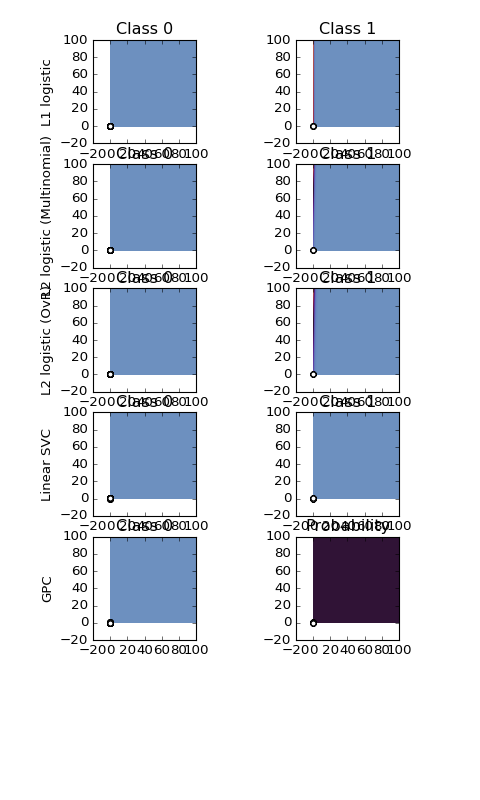

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

iris = datasets.load_iris()

X = np.array(DATA[['std_octant', 'std_quad']])  # we only take the first two features for visualization
y = np.array(DATA['dispersion']) > 45

print(X, y)
n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    "L1 logistic": LogisticRegression(
        C=C, penalty="l1", solver="saga", multi_class="multinomial", max_iter=10000
    ),
    "L2 logistic (Multinomial)": LogisticRegression(
        C=C, penalty="l2", solver="saga", multi_class="multinomial", max_iter=10000
    ),
    "L2 logistic (OvR)": LogisticRegression(
        C=C, penalty="l2", solver="saga", multi_class="ovr", max_iter=10000
    ),
    "Linear SVC": SVC(kernel="linear", C=C, probability=True, random_state=0),
    "GPC": GaussianProcessClassifier(kernel),
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=0.2, top=0.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(
            probas[:, k].reshape((100, 100)), origin="lower"
        )
        # plt.xticks(())
        # plt.yticks(())
        idx = y_pred == k
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker="o", c="w", edgecolor="k")

# ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation="horizontal")

plt.show()

In [64]:
plt.close('all')

In [58]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
DATA['pint_label'] = pd.cut(x = DATA['dispersion'], bins=[0, 42, max(DATA['dispersion'])],labels=[0, 1])


X, y =  np.array(DATA[['std_quad', 'dipole']]), DATA['pint_label']
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=50)
# clf = svm.SVC(kernel='linear')
# # linear kernel computation
# # gram_train = np.dot(X_train, X_train.T)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print(vars(clf))
# # np.array(y_test) == np.array(y_pred)

# plt.close('all')
# plt.scatter(DATA['std_quad'], DATA['dipole'])
# # plt.plot(clf.support_vectors_[:,0])
# plt.show()

In [6]:
# plt.close('all')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay

for i, C in enumerate([25, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train , y_train)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()


NameError: name 'X_train' is not defined

In [2]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


NameError: name 'clf' is not defined

In [1]:
plt.scatter(support_vectors[:, 0], support_vectors[:, 1])
plt.show()

NameError: name 'plt' is not defined